In [108]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [62]:
customer_data = pd.read_csv('musteri_verisi_5000_utf8.csv', delimiter = ',')
order_data = pd.read_csv('satis_verisi_5000.csv', delimiter = ',')

customer_data.head()

,musteri_id,isim,cinsiyet,yas,sehir,harcama_miktari
0,4353,Gülşahin,Kadın,57,Gaziantep,2726.01
1,8374,Yahşikan,Erkek,66,Gaziantep,4754.70
2,3902,Candeniz,Erkek,61,Konya,867.20
3,2080,Gözel,Erkek,64,Adana,2020.97
4,7901,Erdogan,Kadın,63,İstanbul,4334.16


In [63]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   musteri_id       5000 non-null   int64  
 1   isim             5000 non-null   object 
 2   cinsiyet         5000 non-null   object 
 3   yas              5000 non-null   int64  
 4   sehir            5000 non-null   object 
 5   harcama_miktari  5000 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 234.5+ KB


In [64]:
order_data.head()

,Unnamed: 0,tarih,ürün_kodu,ürün_adi,kategori,fiyat,adet,toplam_satis,musteri_id
0,0,2023-07-02,P032,Mouse,Elektronik,1207.3,13,15694.9,9225
1,1,2024-02-11,P011,Kalem,Kırtasiye,237.14,16,3794.24,3955
2,2,2023-03-06,P024,Bilgisayar,Elektronik,1024.29,9,9218.61,2367
3,3,2024-04-11,P063,Klima,Elektronik,1477.88,9,13300920000000000,2869
4,4,2024-01-08,P063,Klima,Elektronik,949.43,19,18039.17,9724


### Soru 1

In [65]:
#drop duplicate index column
order_data = order_data.drop(columns=['Unnamed: 0'])

In [66]:
order_data.head()

,tarih,ürün_kodu,ürün_adi,kategori,fiyat,adet,toplam_satis,musteri_id
0,2023-07-02,P032,Mouse,Elektronik,1207.3,13,15694.9,9225
1,2024-02-11,P011,Kalem,Kırtasiye,237.14,16,3794.24,3955
2,2023-03-06,P024,Bilgisayar,Elektronik,1024.29,9,9218.61,2367
3,2024-04-11,P063,Klima,Elektronik,1477.88,9,13300920000000000,2869
4,2024-01-08,P063,Klima,Elektronik,949.43,19,18039.17,9724


In [68]:
order_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   tarih         5000 non-null   object
 1   ürün_kodu     5000 non-null   object
 2   ürün_adi      5000 non-null   object
 3   kategori      5000 non-null   object
 4   fiyat         5000 non-null   object
 5   adet          5000 non-null   int64 
 6   toplam_satis  5000 non-null   object
 7   musteri_id    5000 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 312.6+ KB


In [70]:
# Converting 'fiyat' and 'toplam_satis' to numeric
order_data['fiyat'] = pd.to_numeric(order_data['fiyat'], errors='coerce')
order_data['toplam_satis'] = pd.to_numeric(order_data['toplam_satis'], errors='coerce')

# Checking for any invalid or missing values introduced during conversion
fiyat_na_count = order_data['fiyat'].isna().sum()
toplam_satis_na_count = order_data['toplam_satis'].isna().sum()

fiyat_na_count, toplam_satis_na_count

(42, 4)

In [71]:
# Filling NaN values in 'fiyat' and 'toplam_satis' with their respective medians
fiyat_median = order_data['fiyat'].median()
toplam_satis_median = order_data['toplam_satis'].median()

order_data['fiyat'].fillna(fiyat_median, inplace=True)
order_data['toplam_satis'].fillna(toplam_satis_median, inplace=True)

/var/folders/c5/p6vhyyzj0vl8fbh0xhvxn7xr0000gq/T/ipykernel_77639/1158671994.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order_data['fiyat'].fillna(fiyat_median, inplace=True)
/var/folders/c5/p6vhyyzj0vl8fbh0xhvxn7xr0000gq/T/ipykernel_77639/1158671994.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

In [72]:
fiyat_na_count = order_data['fiyat'].isna().sum()
toplam_satis_na_count = order_data['toplam_satis'].isna().sum()

fiyat_na_count, toplam_satis_na_count

(0, 0)

In [73]:
# Detecting outliers in numeric columns using the IQR (Interquartile Range) method
numeric_columns = order_data.select_dtypes(include=['float64', 'int64']).columns

# Function to detect outliers using IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Apply the function to numeric columns
outlier_summary = {col: detect_outliers(order_data, col) for col in numeric_columns}

# Count outliers for each numeric column
outlier_counts = {col: len(outliers) for col, outliers in outlier_summary.items()}
outlier_counts


{'fiyat': 0, 'adet': 0, 'toplam_satis': 467, 'musteri_id': 0}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


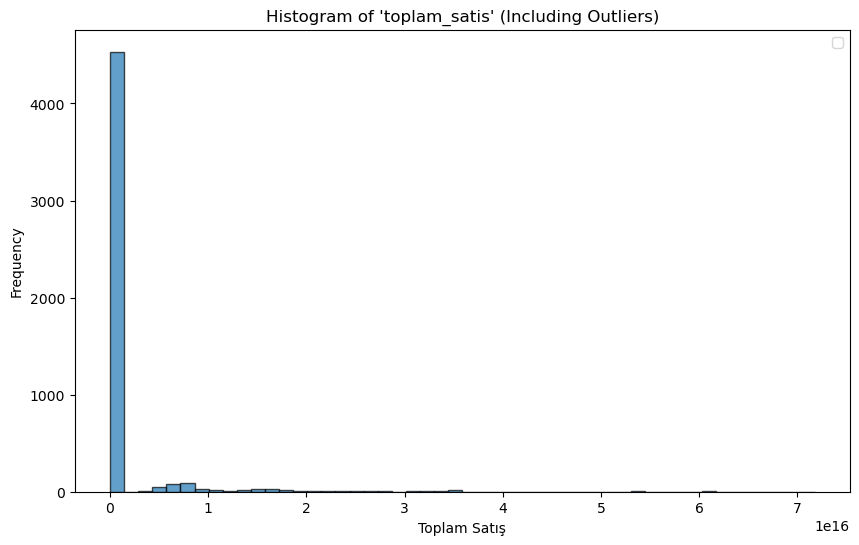

In [98]:
plt.figure(figsize=(10, 6))
plt.hist(order_data['toplam_satis'], bins=50, alpha=0.7, edgecolor='black')
plt.title("Histogram of 'toplam_satis' (Including Outliers)")
plt.xlabel("Toplam Satış")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [75]:
# Calculate the upper threshold for 'toplam_satis' using the IQR method
Q1 = order_data['toplam_satis'].quantile(0.25)
Q3 = order_data['toplam_satis'].quantile(0.75)
IQR = Q3 - Q1
upper_threshold = Q3 + 1.5 * IQR

# Remove rows with 'toplam_satis' above the upper threshold
satis_verisi_cleaned_df = order_data[order_data['toplam_satis'] <= upper_threshold]

# Confirm the removal by rechecking for outliers in 'toplam_satis'
remaining_outliers = detect_outliers(satis_verisi_cleaned_df, 'toplam_satis')
remaining_outlier_count = len(remaining_outliers)

# Display the number of rows before and after cleaning
original_row_count = len(order_data)
cleaned_row_count = len(satis_verisi_cleaned_df)

original_row_count, cleaned_row_count, remaining_outlier_count


(5000, 4533, 21)

In [76]:
data = pd.merge(order_data, customer_data, on='musteri_id', how = 'left')
data.head()

,tarih,ürün_kodu,ürün_adi,kategori,fiyat,adet,toplam_satis,musteri_id,isim,cinsiyet,yas,sehir,harcama_miktari
0,2023-07-02,P032,Mouse,Elektronik,1207.30,13,1.569490e+04,9225,Masume,Kadın,35,İstanbul,3588.15
1,2024-02-11,P011,Kalem,Kırtasiye,237.14,16,3.794240e+03,3955,Fenni,Kadın,64,Konya,3742.46
2,2023-03-06,P024,Bilgisayar,Elektronik,1024.29,9,9.218610e+03,2367,Feyruz,Kadın,45,Bursa,197.55
3,2024-04-11,P063,Klima,Elektronik,1477.88,9,1.330092e+16,2869,Ülke,Kadın,43,İstanbul,3662.18
4,2024-01-08,P063,Klima,Elektronik,949.43,19,1.803917e+04,9724,Tonguç,Erkek,41,Bursa,2536.20


In [78]:
null_values_count = data.isnull().sum()

# Display the null values count
null_values_count

tarih              0
ürün_kodu          0
ürün_adi           0
kategori           0
fiyat              0
adet               0
toplam_satis       0
musteri_id         0
isim               0
cinsiyet           0
yas                0
sehir              0
harcama_miktari    0
dtype: int64

In [79]:
# Check unique values count for each column
unique_values_count = data.nunique()

# Display the unique values count
unique_values_count

tarih               731
ürün_kodu            10
ürün_adi             10
kategori              5
fiyat              4867
adet                 19
toplam_satis       4984
musteri_id         3147
isim               1305
cinsiyet              2
yas                  52
sehir                 8
harcama_miktari    3132
dtype: int64

### Soru 2

In [99]:
# Adding week and month columns to the dataset
data['year_week'] = data['tarih'].dt.to_period('W')
data['month'] = data['tarih'].dt.to_period('M')

# Weekly sales analysis
weekly_sales = data.groupby('year_week')['toplam_satis'].sum().reset_index()
weekly_sales.columns = ['Week', 'Total_Sales']

# Monthly sales analysis
monthly_sales = data.groupby('month')['toplam_satis'].sum().reset_index()
monthly_sales.columns = ['Month', 'Total_Sales']

# Weekly product sales trends
weekly_product_sales = data.groupby(['ürün_kodu', 'year_week'])['toplam_satis'].sum().reset_index()
weekly_product_sales.columns = ['Product_Code', 'Week', 'Total_Sales']

# Monthly product sales trends
monthly_product_sales = data.groupby(['ürün_kodu', 'month'])['toplam_satis'].sum().reset_index()
monthly_product_sales.columns = ['Product_Code', 'Month', 'Total_Sales']


In [110]:
weekly_sales[:50]

,Week,Total_Sales
0,2022-10-31/2022-11-06,6.209640e+16
1,2022-11-07/2022-11-13,2.638466e+16
2,2022-11-14/2022-11-20,5.184241e+16
3,2022-11-21/2022-11-27,6.468885e+16
4,2022-11-28/2022-12-04,5.732960e+16
5,2022-12-05/2022-12-11,2.145417e+16
6,2022-12-12/2022-12-18,5.247800e+15
7,2022-12-19/2022-12-25,4.020303e+16
8,2022-12-26/2023-01-01,3.951033e+16
9,2023-01-02/2023-01-08,7.134960e+15


In [114]:
monthly_sales

,Month,Total_Sales
0,2022-11,2.104615e+17
1,2022-12,1.444054e+17
2,2023-01,2.675960e+17
3,2023-02,1.737064e+17
4,2023-03,2.939165e+17
5,2023-04,3.223395e+17
6,2023-05,3.211192e+17
7,2023-06,2.657772e+17
8,2023-07,3.077364e+17
9,2023-08,2.380974e+17


In [113]:
weekly_product_sales[:50]

,Product_Code,Week,Total_Sales
0,P010,2022-10-31/2022-11-06,8.772000e+15
1,P010,2022-11-07/2022-11-13,4.630627e+04
2,P010,2022-11-14/2022-11-20,4.794210e+15
3,P010,2022-11-21/2022-11-27,1.993456e+04
4,P010,2022-11-28/2022-12-04,7.832280e+03
5,P010,2022-12-05/2022-12-11,8.537499e+04
6,P010,2022-12-12/2022-12-18,1.254355e+04
7,P010,2022-12-19/2022-12-25,8.891280e+15
8,P010,2022-12-26/2023-01-01,3.234746e+04
9,P010,2023-01-02/2023-01-08,3.786052e+04


In [103]:
monthly_product_sales

,Product_Code,Month,Total_Sales
0,P010,2022-11,1.356621e+16
1,P010,2022-12,8.891280e+15
2,P010,2023-01,3.214640e+16
3,P010,2023-02,2.587410e+16
4,P010,2023-03,3.913410e+16
...,...,...,...
245,P097,2024-07,1.177740e+16
246,P097,2024-08,2.669967e+16
247,P097,2024-09,7.618800e+15
248,P097,2024-10,7.205040e+15


In [106]:
# Finding the first and last sales date for each month
first_last_sales = data.groupby('month')['tarih'].agg(First_Sale='min', Last_Sale='max').reset_index()

# Calculating the total number of products sold each week
weekly_product_sales_count = data.groupby('year_week')['adet'].sum().reset_index()
weekly_product_sales_count.columns = ['Week', 'Total_Products_Sold']


In [107]:
weekly_product_sales_count

,Week,Total_Products_Sold
0,2022-10-31/2022-11-06,57
1,2022-11-07/2022-11-13,428
2,2022-11-14/2022-11-20,455
3,2022-11-21/2022-11-27,459
4,2022-11-28/2022-12-04,518
...,...,...
101,2024-10-07/2024-10-13,522
102,2024-10-14/2024-10-20,454
103,2024-10-21/2024-10-27,641
104,2024-10-28/2024-11-03,472


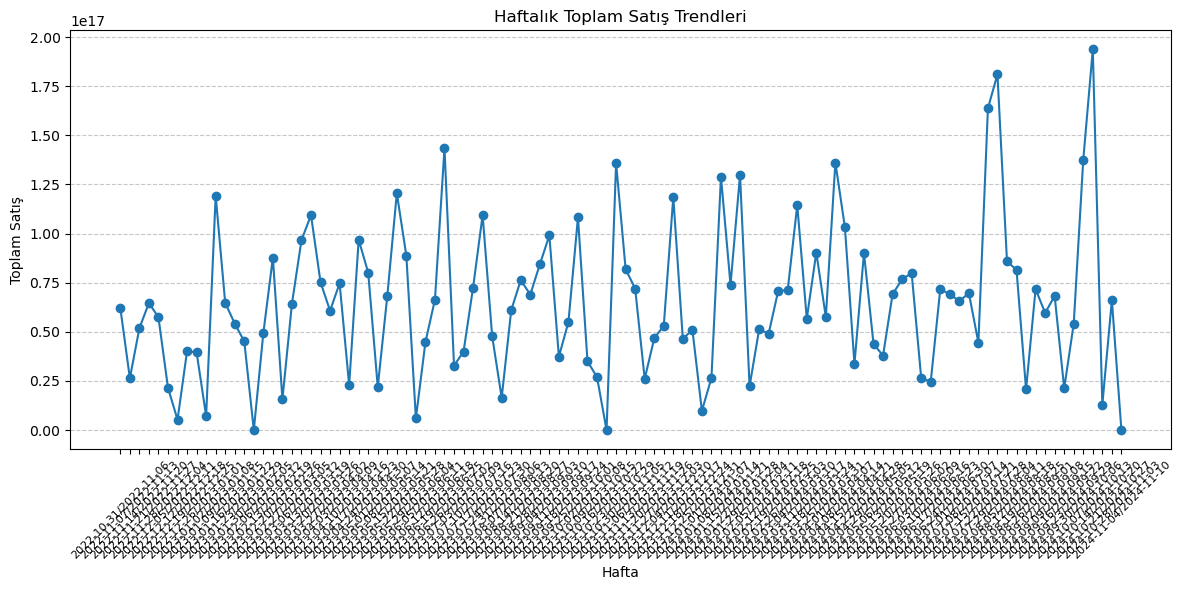

In [104]:
# Visualizing weekly total sales trends
plt.figure(figsize=(12, 6))
plt.plot(weekly_sales['Week'].astype(str), weekly_sales['Total_Sales'], marker='o', linestyle='-')
plt.title("Haftalık Toplam Satış Trendleri")
plt.xlabel("Hafta")
plt.ylabel("Toplam Satış")
plt.xticks(rotation=45, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


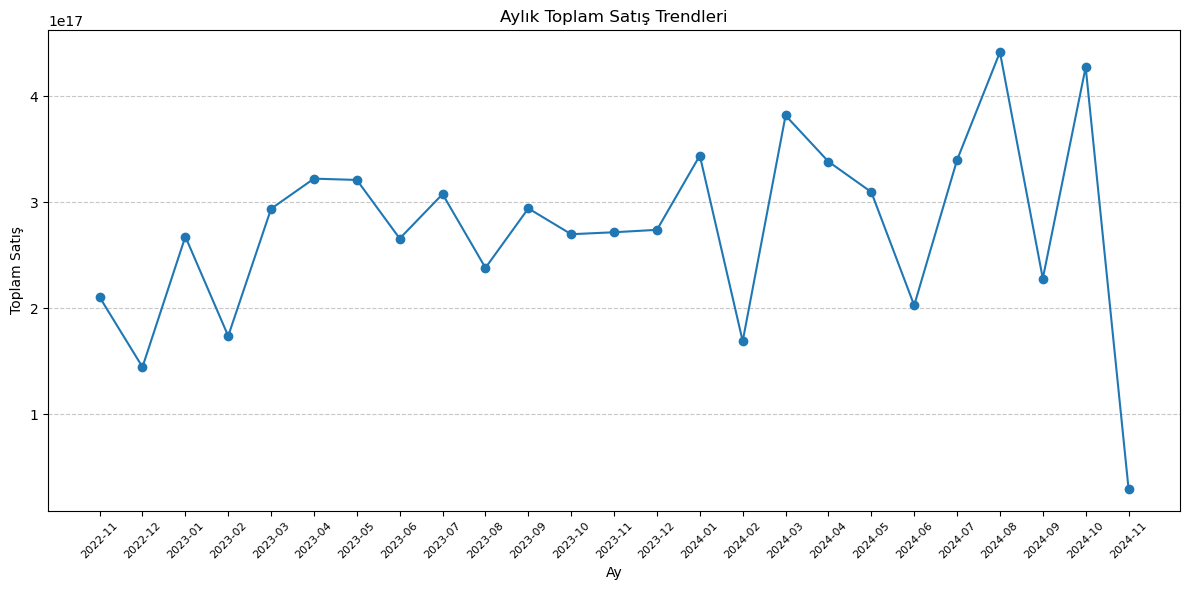

In [105]:
# Visualizing monthly total sales trends
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Month'].astype(str), monthly_sales['Total_Sales'], marker='o', linestyle='-')
plt.title("Aylık Toplam Satış Trendleri")
plt.xlabel("Ay")
plt.ylabel("Toplam Satış")
plt.xticks(rotation=45, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Soru 3

In [82]:
# Calculating total sales amount for each product category
category_sales = data.groupby('kategori')['toplam_satis'].sum().sort_values(ascending=False)

# Calculating the proportion of each category's sales to total sales
total_sales = category_sales.sum()
category_proportions = (category_sales / total_sales) * 100

# Combining the results into a single DataFrame
category_analysis = pd.DataFrame({
    'Toplam Satış': category_sales,
    'Satış Oranı (%)': category_proportions
}).reset_index()


In [83]:
category_analysis

,kategori,Toplam Satış,Satış Oranı (%)
0,Elektronik,3.567578e+18,51.948219
1,Kırtasiye,1.366093e+18,19.891951
2,Mutfak Ürünleri,7.152848e+17,10.415404
3,Ev Aletleri,6.093816e+17,8.873327
4,Giyim,6.092286e+17,8.871099


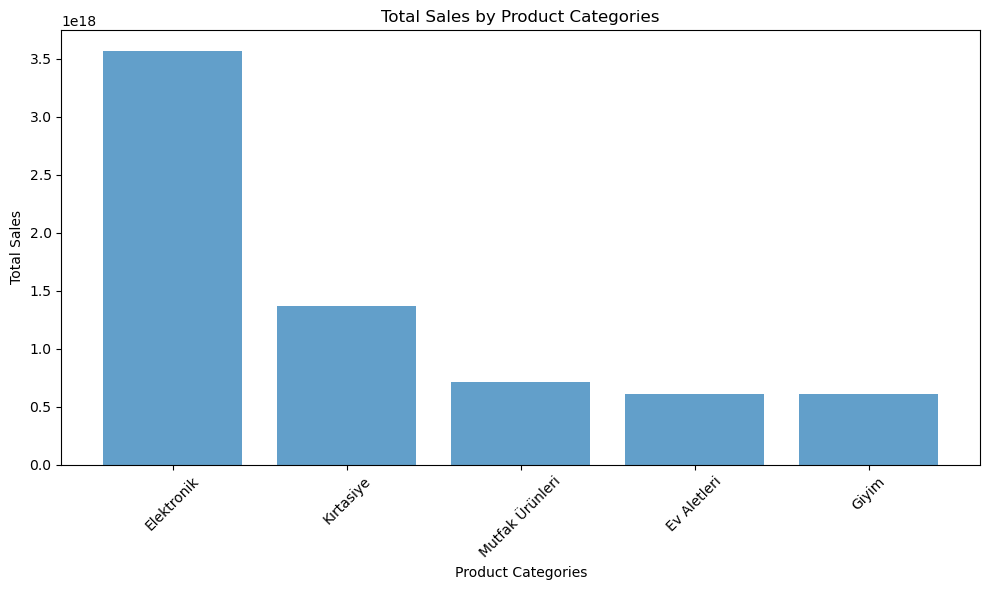

In [85]:
# Visualize the sales data by product categories
plt.figure(figsize=(10, 6))
plt.bar(category_analysis['kategori'], category_analysis['Toplam Satış'], alpha=0.7)
plt.title('Total Sales by Product Categories')
plt.xlabel('Product Categories')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [91]:
# Defining age groups
age_bins = [18, 25, 35, 50, float('inf')]
age_labels = ['18-25', '26-35', '36-50', '50+']

# Adding age group to the merged dataset
data['yas_grubu'] = pd.cut(data['yas'], bins=age_bins, labels=age_labels, right=False)

# Detailed analysis for age groups
age_group_sales = data.groupby('yas_grubu').agg(
    Total_Sales=('toplam_satis', 'sum'),
    Average_Sales=('toplam_satis', 'mean'),
    Median_Sales=('toplam_satis', 'median'),
    Max_Sales=('toplam_satis', 'max'),
    Min_Sales=('toplam_satis', 'min'),
    Total_Customers=('musteri_id', 'count'),
    Total_Spending=('harcama_miktari', 'sum'),
    Average_Spending=('harcama_miktari', 'mean'),
    Median_Spending=('harcama_miktari', 'median'),
).sort_values(by='Total_Sales', ascending=False).reset_index()

age_group_sales

/var/folders/c5/p6vhyyzj0vl8fbh0xhvxn7xr0000gq/T/ipykernel_77639/2895476496.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_sales = data.groupby('yas_grubu').agg(


,yas_grubu,Total_Sales,Average_Sales,Median_Sales,Max_Sales,Min_Sales,Total_Customers,Total_Spending,Average_Spending,Median_Spending
0,50+,2.570536e+18,1.343720e+15,6279.85,6.911730e+16,33.79,1913,5053820.57,2641.829885,2705.06
1,36-50,2.217446e+18,1.497263e+15,6928.11,7.175480e+16,22.28,1481,3777038.22,2550.329656,2486.64
2,26-35,1.320124e+18,1.417963e+15,6642.95,5.566440e+16,22.96,931,2435692.22,2616.210763,2610.20
3,18-25,7.594603e+17,1.125126e+15,7039.92,5.951000e+16,36.11,675,1688278.82,2501.153807,2468.02


In [93]:
# Analyzing sales by category within each age group
category_age_group_analysis = data.groupby(['yas_grubu', 'kategori']).agg(
    Total_Sales=('toplam_satis', 'sum'),
    Average_Sales=('toplam_satis', 'mean'),
    Total_Transactions=('toplam_satis', 'count')
).sort_values(by=['yas_grubu', 'Total_Sales'], ascending=[True, False]).reset_index()

category_age_group_analysis


/var/folders/c5/p6vhyyzj0vl8fbh0xhvxn7xr0000gq/T/ipykernel_77639/2577854858.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_age_group_analysis = data.groupby(['yas_grubu', 'kategori']).agg(


,yas_grubu,kategori,Total_Sales,Average_Sales,Total_Transactions
0,18-25,Elektronik,4.471149e+17,1.371518e+15,326
1,18-25,Kırtasiye,1.088260e+17,8.001912e+14,136
2,18-25,Giyim,8.952045e+16,1.105191e+15,81
3,18-25,Ev Aletleri,7.239401e+16,1.131156e+15,64
4,18-25,Mutfak Ürünleri,4.160496e+16,6.118376e+14,68
5,26-35,Elektronik,7.062631e+17,1.532024e+15,461
6,26-35,Kırtasiye,3.465563e+17,1.698805e+15,204
7,26-35,Mutfak Ürünleri,1.606571e+17,1.691128e+15,95
8,26-35,Ev Aletleri,7.985350e+16,8.318073e+14,96
9,26-35,Giyim,2.679363e+16,3.572484e+14,75


In [92]:
# Detailed spending analysis by gender
detailed_gender_spending = data.groupby('cinsiyet').agg(
    Total_Spending=('harcama_miktari', 'sum'),
    Average_Spending=('harcama_miktari', 'mean'),
    Median_Spending=('harcama_miktari', 'median'),
    Max_Spending=('harcama_miktari', 'max'),
    Min_Spending=('harcama_miktari', 'min'),
    Count=('harcama_miktari', 'count')
).sort_values(by='Total_Spending', ascending=False).reset_index()

detailed_gender_spending

,cinsiyet,Total_Spending,Average_Spending,Median_Spending,Max_Spending,Min_Spending,Count
0,Kadın,6606229.86,2610.126377,2589.07,4998.68,102.36,2531
1,Erkek,6348599.97,2571.324411,2559.87,4999.44,101.68,2469


### Soru 4


In [94]:
# Analyzing total spending by city
city_spending_analysis = data.groupby('sehir').agg(
    Total_Spending=('harcama_miktari', 'sum'),
    Total_Customers=('musteri_id', 'count'),
    Average_Spending=('harcama_miktari', 'mean')
).sort_values(by='Total_Spending', ascending=False).reset_index()

city_spending_analysis


,sehir,Total_Spending,Total_Customers,Average_Spending
0,Gaziantep,1740073.60,653,2664.737519
1,İzmir,1739145.40,652,2667.400920
2,Bursa,1665417.27,630,2643.519476
3,Ankara,1649167.77,613,2690.322626
4,Antalya,1581436.54,646,2448.044180
5,Konya,1556038.91,622,2501.670273
6,Adana,1552729.00,601,2583.575707
7,İstanbul,1470821.34,583,2522.849640


In [95]:
# Converting 'tarih' column to datetime format for monthly analysis
data['tarih'] = pd.to_datetime(data['tarih'])

# Extracting year and month for grouping
data['year_month'] = data['tarih'].dt.to_period('M')

# Calculating monthly total sales for each product
monthly_sales = data.groupby(['ürün_kodu', 'year_month'])['toplam_satis'].sum().reset_index()

# Sorting by product and date for proper calculation
monthly_sales = monthly_sales.sort_values(by=['ürün_kodu', 'year_month'])

# Calculating the percentage change in sales for each product
monthly_sales['sales_change_percentage'] = monthly_sales.groupby('ürün_kodu')['toplam_satis'].pct_change() * 100

# Calculating the average sales increase percentage for each product
product_sales_growth = monthly_sales.groupby('ürün_kodu')['sales_change_percentage'].mean().reset_index()

# Renaming columns for clarity
product_sales_growth.columns = ['ürün_kodu', 'average_sales_growth_percentage']


In [96]:
product_sales_growth

,ürün_kodu,average_sales_growth_percentage
0,P010,2.442176e+12
1,P011,3.459205e+12
2,P018,7.628032e+11
3,P024,3.367052e+12
4,P032,2.170872e+12
5,P037,5.017252e+12
6,P063,5.993208e+12
7,P082,2.028762e+12
8,P087,3.275224e+12
9,P097,3.005722e+12


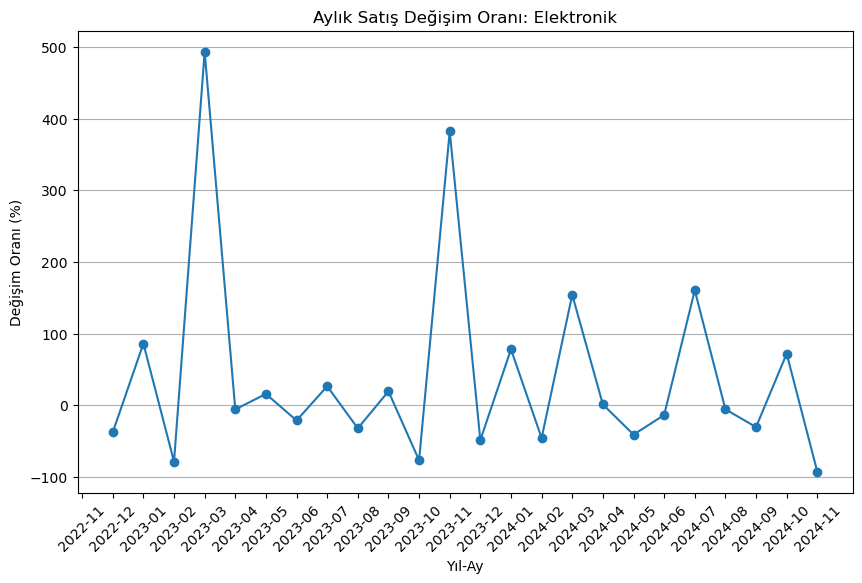

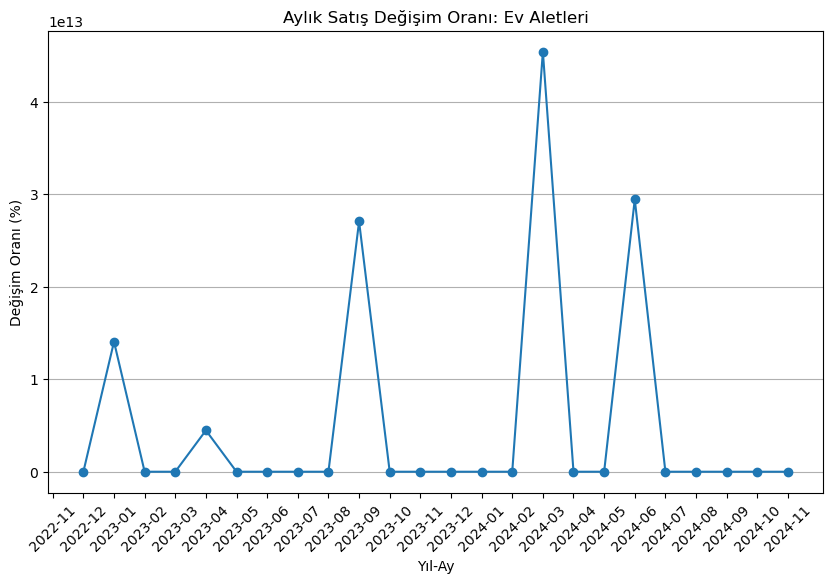

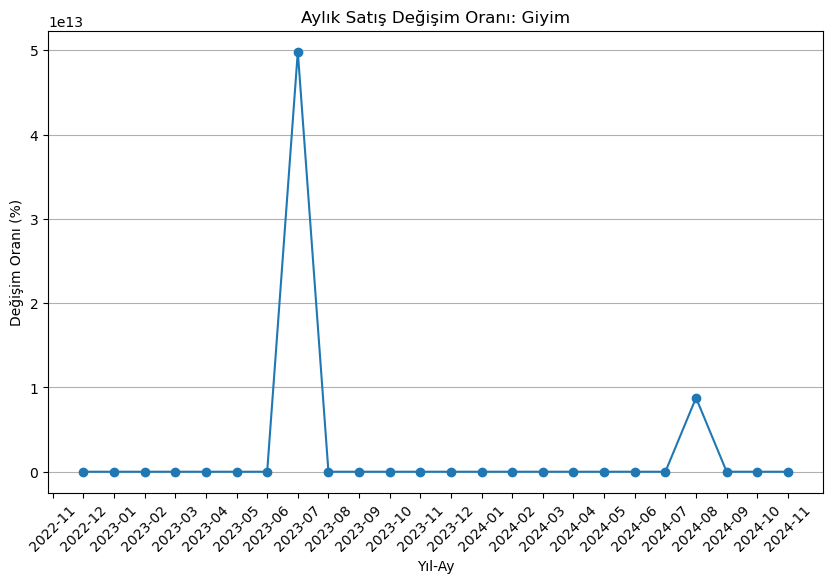

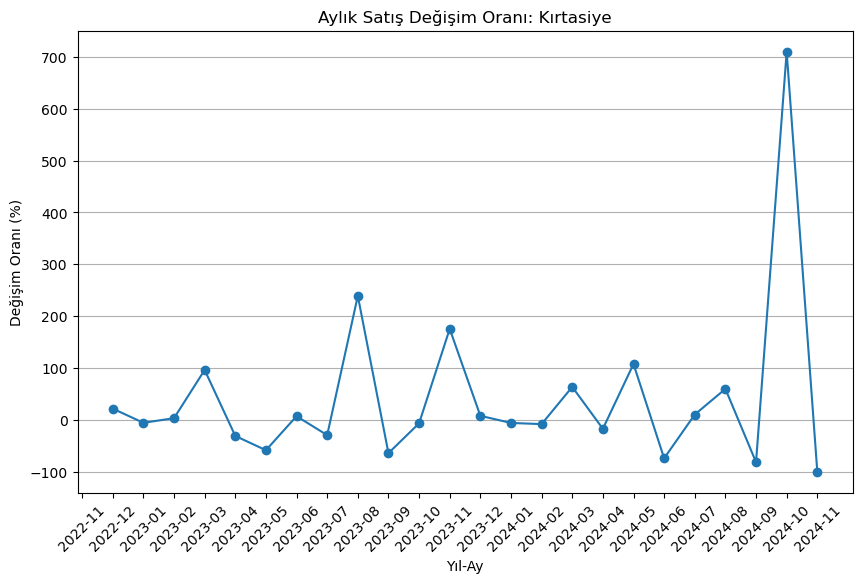

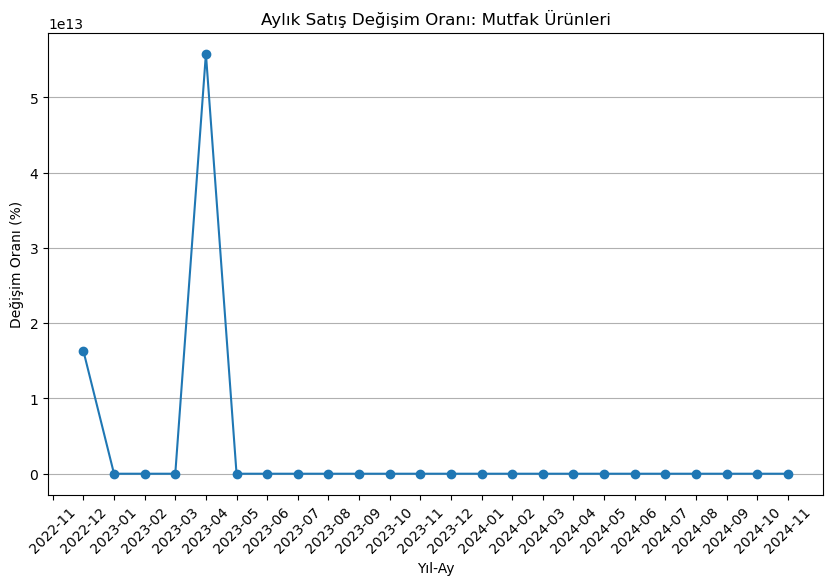

In [97]:
# Calculating monthly total sales for each category
monthly_category_sales = data.groupby(['kategori', 'year_month'])['toplam_satis'].sum().reset_index()

# Calculating the percentage change in monthly sales for each category
monthly_category_sales['sales_change_percentage'] = monthly_category_sales.groupby('kategori')['toplam_satis'].pct_change() * 100

# Plotting the sales change percentages for each category
categories = monthly_category_sales['kategori'].unique()

# Creating a plot for each category
for category in categories:
    category_data = monthly_category_sales[monthly_category_sales['kategori'] == category]
    plt.figure(figsize=(10, 6))
    plt.plot(category_data['year_month'].astype(str), category_data['sales_change_percentage'], marker='o')
    plt.title(f"Aylık Satış Değişim Oranı: {category}")
    plt.xlabel("Yıl-Ay")
    plt.ylabel("Değişim Oranı (%)")
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()


Bonus

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Preparing the data for regression
monthly_sales['Month_Num'] = monthly_sales['Month'].astype(str).apply(lambda x: int(x.split('-')[0]) * 12 + int(x.split('-')[1]))  # Converting month to numeric values

# Features (X) and target (y)
X = monthly_sales[['Month_Num']]
y = monthly_sales['Total_Sales']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Calculating model performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Displaying results
model_performance = {
    'Mean Absolute Error (MAE)': mae,
    'Mean Squared Error (MSE)': mse,
    'Root Mean Squared Error (RMSE)': rmse,
    'R-squared (R2)': r2
}

model_performance


{'Mean Absolute Error (MAE)': 7.621234633520464e+16,
 'Mean Squared Error (MSE)': 8.904121707270569e+33,
 'Root Mean Squared Error (RMSE)': 9.436165379681818e+16,
 'R-squared (R2)': -0.4784613897877974}